In [85]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 

shpae of the image (500, 500)


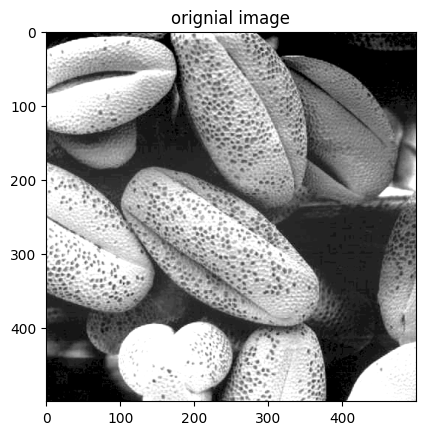

In [86]:
#load the original image
original_image = cv2.imread('Images/seedsBright.tif', 0)
print(f"shpae of the image {original_image.shape}")
plt.imshow(original_image, cmap='gray')
plt.title('orignial image')
plt.show()


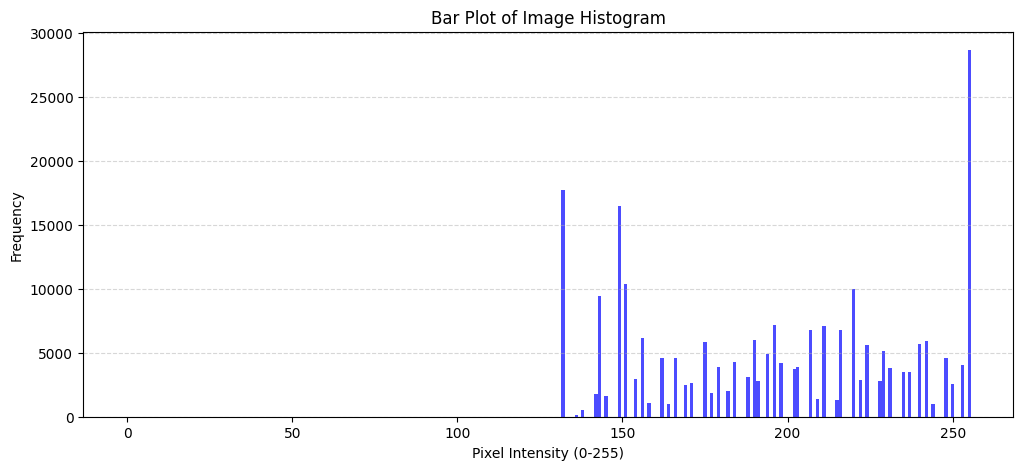

In [87]:
# Compute the histogram
histogram, bins = np.histogram(original_image.flatten(), bins=256, range=[0, 256])

# Create bar plot
plt.figure(figsize=(12, 5))
plt.bar(range(256), histogram, width=1.0, color='blue', alpha=0.7)

# Labels and Title
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Frequency")
plt.title("Bar Plot of Image Histogram")
plt.grid(axis="y", linestyle="--", alpha=0.5) 

plt.show()

In [88]:
#calculating the histogram 
def imhist(image):
    hist = np.zeros(256)
    for i in range(256):
        hist[i] = sum(sum(image==i))
    return hist    

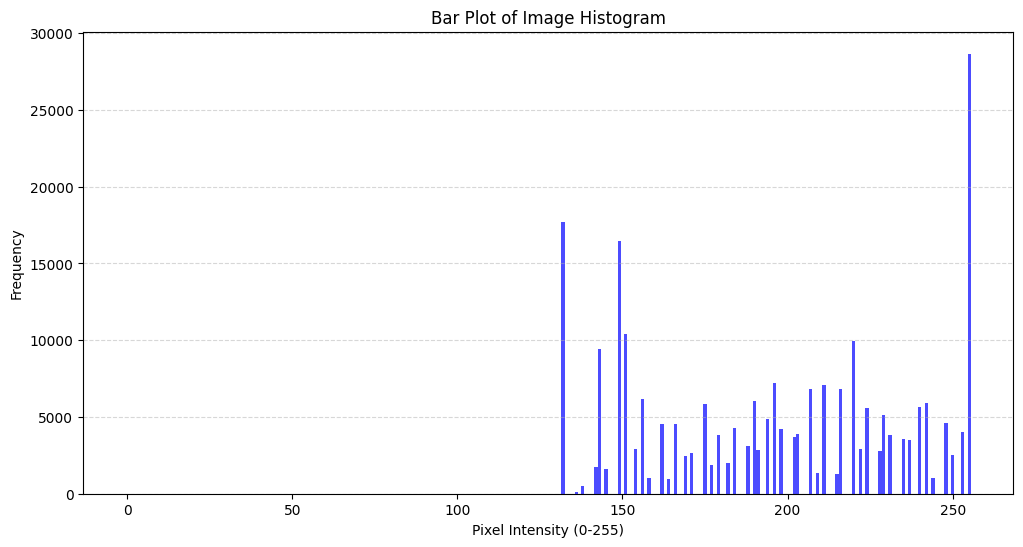

In [89]:
#ploting histogram 
x = np.arange(256)
original_image_hist = imhist(original_image)

plt.figure(figsize=(12,6))
plt.bar(x, original_image_hist, width=1.0, color='blue', alpha=0.7)

plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Frequency")
plt.title("Bar Plot of Image Histogram")
plt.grid(axis="y", linestyle="--", alpha=0.5)  # Add grid for better visualization
plt.show()

In [90]:
def compute_histogram(image):
    hist = [0]*256
    for row in image:
        for pixel in row:
            hist[pixel]+=1
    return hist        

In [91]:
def compute_pdf(histogram, total_pixels):
    pdf = [val/total_pixels for val in histogram]
    return pdf

In [92]:
def compute_cdf(pdf):
    cdf = [0]*256
    cdf[0] = pdf[0]
    for i in range(1,256):
        cdf[i] = cdf[i-1] + pdf[i]
    return cdf    

In [93]:
def normalize_cdf(cdf):
    cdf_min = min([val for val in cdf if val>0])
    equalized_cdf = [((val-cdf_min)/(1-cdf_min))*255 for val in cdf]  # Normalize to 0-255
    return [int(round(val)) for val in equalized_cdf]
    

In [94]:
def apply_histogram_equalization(image, equalized_cdf):
    equalized_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            equalized_image[i,j] = equalized_cdf[image[i,j]]
    return equalized_image        
    

In [95]:
histogram = compute_histogram(original_image)
pdf = compute_pdf(histogram, original_image.size)
cdf = compute_cdf(pdf)
equalized_cdf = normalize_cdf(cdf)
equalized_image = apply_histogram_equalization(original_image, equalized_cdf)


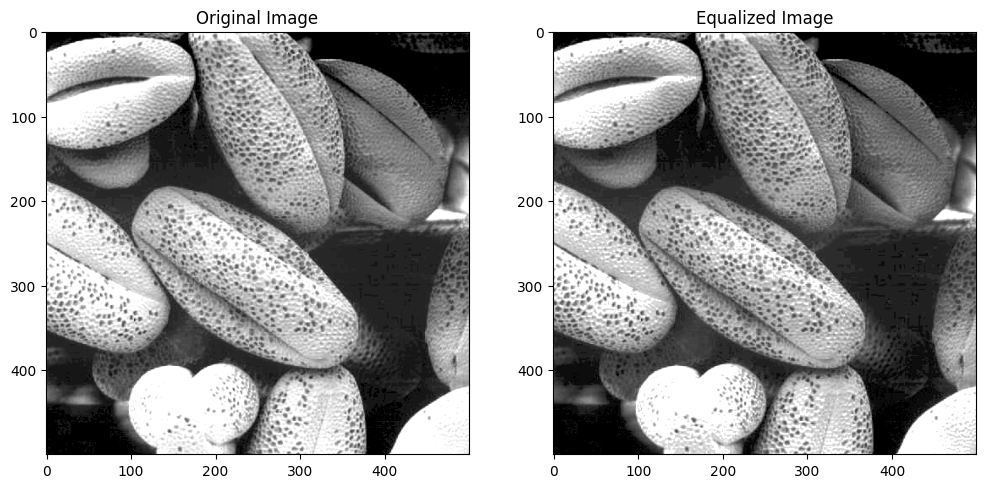

In [96]:
#display orignal an equalized image 
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')

plt.show()


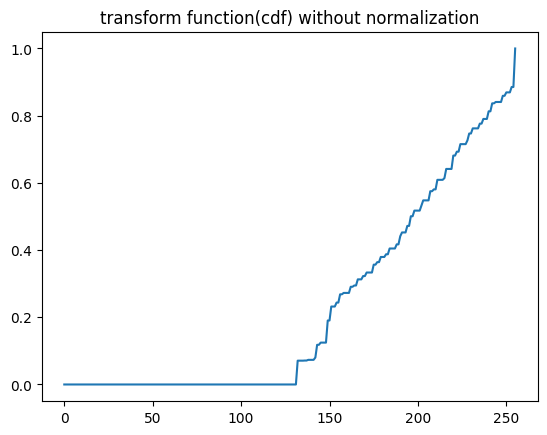

In [97]:
plt.plot(cdf)
plt.title('transform function(cdf) without normalization')
plt.show()

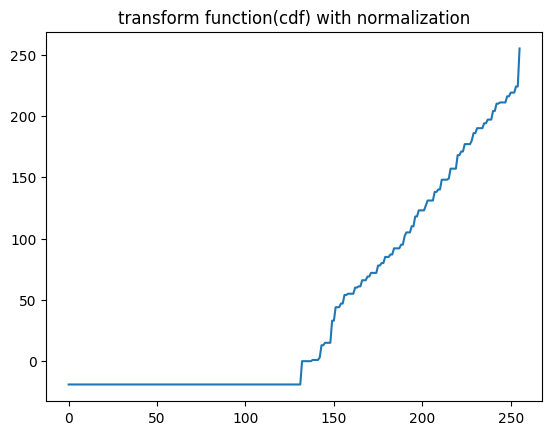

In [98]:
plt.plot(equalized_cdf)
plt.title('transform function(cdf) with normalization')
plt.show()

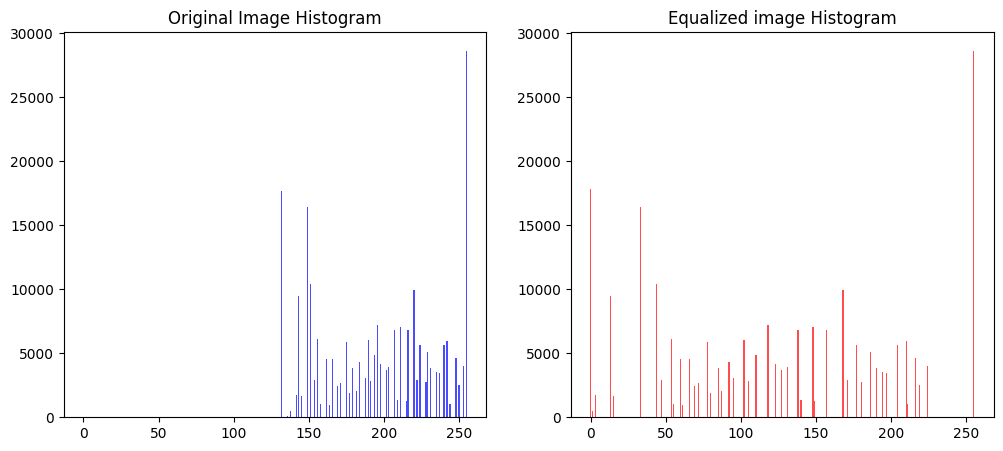

In [99]:
#display the histogram comparsion 
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.bar(range(256), histogram, color='blue', alpha=0.7)
plt.title('Original Image Histogram')

plt.subplot(1,2,2)
equalized_hist = compute_histogram(equalized_image)
plt.bar(range(256), equalized_hist, color='red', alpha=0.7)
plt.title("Equalized image Histogram")

plt.show()

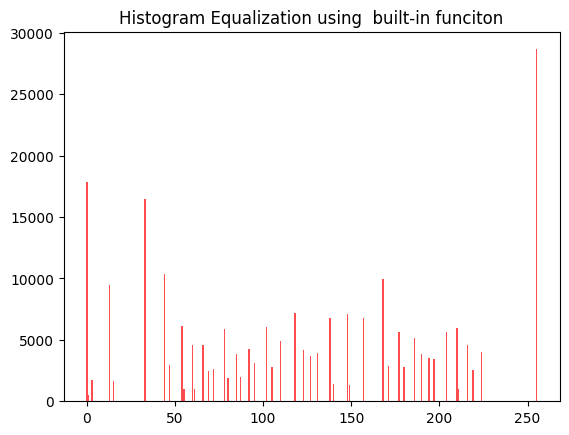

In [100]:
equalized_image_built = cv2.equalizeHist(original_image)
equalized_image_built_hist = compute_histogram(equalized_image_built)

plt.bar(range(256), equalized_image_built_hist, color='red', alpha=0.7)
plt.title('Histogram Equalization using  built-in funciton')
plt.show()